# M02 Homework

```yaml
Course:   DS 5001 
Author:   JiHo Lee (qxz6hb)
```

### Question 1. How many raw tokens are in the combined data frame?

>

### Question 2. How many distinct terms are there in the combined data frame (i.e. how big is the vocabulary)?

>

### Question 3. How many more terms does the vocabulary of Sense and Sensibility have than that of Persuasion?

>

### Question 4. What is the average number of tokens, rounded to an integer, per chapter in the corpus?

>

### Question 5. What is the average number of tokens, rounded to an integer, per paragraph in the corpus?

>


### Import libraries

In [1]:
import pandas as pd

import configparser
config = configparser.ConfigParser()
config.read("../../../env.ini")
data_home = config['DEFAULT']['data_home']
output_dir = config['DEFAULT']['output_dir']
data_home = data_home.replace('/', '\\')
output_dir = output_dir.replace('/', '\\')

text_file = f"{data_home}/gutenberg/pg161.txt"
csv_file  = f"{output_dir}/austen-persuasion.csv" # The file we will create

OHCO = ['chap_num', 'para_num', 'sent_num', 'token_num']

## Import file into a dataframe

In [6]:
LINES = pd.DataFrame(open(text_file, 'r', encoding='utf-8-sig').readlines(), columns=['line_str'])
LINES.index.name = 'line_num'
LINES.line_str = LINES.line_str.str.replace(r'\n+', ' ', regex=True).str.strip()

In [7]:
LINES.sample(20)

,line_str
line_num,
6879,"about three years old. She loved the child, a..."
9733,"Street, and as since that time no notice had b..."
10372,
10283,
12420,"a few weeks ago, had robbed her of one; the si..."
4748,
504,
11380,"""When the weather is settled, and I have recov..."
9777,"""About two hundred a year."""


## Extract Title 

In [8]:
title = LINES.loc[0].line_str.replace('The Project Gutenberg EBook of ', '')

In [9]:
print(title)

Sense and Sensibility, by Jane Austen


## Clip the Cruft

In [10]:
clip_pats = [
    r"\*\*\*\s*START OF (?:THE|THIS) PROJECT",
    r"\*\*\*\s*END OF (?:THE|THIS) PROJECT"
]

In [11]:
pat_a = LINES.line_str.str.match(clip_pats[0])
pat_b = LINES.line_str.str.match(clip_pats[1])

In [12]:
line_a = LINES.loc[pat_a].index[0] + 1
line_b = LINES.loc[pat_b].index[0] - 1

In [13]:
line_a, line_b

(20, 12666)

In [14]:
LINES = LINES.loc[line_a : line_b]

In [15]:
LINES.head(10)

,line_str
line_num,
20,
21,
22,
23,
24,
25,
26,
27,
28,


In [16]:
LINES.tail(10)

,line_str
line_num,
12657,
12658,
12659,
12660,
12661,
12662,
12663,
12664,
12665,End of the Project Gutenberg EBook of Sense an...


## Chunk by Chapter

### Find all chapter headers

The regex will depend on the source text. You need to investigate the source text to figure this out.

In [17]:
chap_pat = r"^\s*(?:chapter|letter)\s+\d+"

In [18]:
chap_lines = LINES.line_str.str.match(chap_pat, case=False) # Returns a truth vector

In [19]:
LINES.loc[chap_lines] # Use as filter for dataframe

,line_str
line_num,
42,CHAPTER 1
196,CHAPTER 2
399,CHAPTER 3
561,CHAPTER 4
756,CHAPTER 5
858,CHAPTER 6
986,CHAPTER 7
1112,CHAPTER 8
1244,CHAPTER 9


### Assign numbers to chapters

In [20]:
LINES.loc[chap_lines, 'chap_num'] = [i+1 for i in range(LINES.loc[chap_lines].shape[0])]

In [21]:
LINES.loc[chap_lines]

,line_str,chap_num
line_num,,
42,CHAPTER 1,1.0
196,CHAPTER 2,2.0
399,CHAPTER 3,3.0
561,CHAPTER 4,4.0
756,CHAPTER 5,5.0
858,CHAPTER 6,6.0
986,CHAPTER 7,7.0
1112,CHAPTER 8,8.0
1244,CHAPTER 9,9.0


Notice that all lines that are not chapter headers have no chapter number assigned to them.

In [22]:
LINES.sample(10)

,line_str,chap_num
line_num,,
12213,seemed nothing to tempt the avarice or the van...,NaN
6054,"till one. Determined not to quit Marianne, th...",NaN
10949,"""Yes, you have certainly removed something--a ...",NaN
12460,considerable improvements; and after waiting s...,NaN
3362,"and designs. The shortness of his visit, the ...",NaN
5029,think me a very fit person to have the charge ...,NaN
6112,"suffer now, think of what you would have suffe...",NaN
1867,She was faithful to her word; and when Willoug...,NaN
2767,"state of the affair, and of instantly removing...",NaN


### Forward-fill chapter numbers to following text lines

`ffill()` will replace null values with the previous non-null value.

In [23]:
LINES.chap_num = LINES.chap_num.ffill()

In [24]:
LINES.sample(10)

,line_str,chap_num
line_num,,
1336,"home was at Allenham, from whence he hoped she...",9.0
49,surrounding acquaintance. The late owner of t...,1.0
6577,"been a day of general elucidation, for this ve...",30.0
9246,"see, in a more eligible, more comfortable mann...",39.0
6394,"me, that a man should use such a pretty girl s...",30.0
7438,"droll, if Fanny should have a brother and I a ...",33.0
4399,"instantly, acknowledging the likeness.",22.0
8403,"them; indeed, you DO like them, you know, very...",36.0
7016,"effect of it, in her no longer avoiding Colone...",32.0


Notice that the lines taht precede our first chapter have no chapters, which is what we want. We need to decide whether to keep these lines as textual front matter or to dispose of them.

In [25]:
LINES.head(20)

,line_str,chap_num
line_num,,
20,,NaN
21,,NaN
22,,NaN
23,,NaN
24,,NaN
25,,NaN
26,,NaN
27,,NaN
28,,NaN


### Clean up

In [26]:
LINES = LINES.dropna(subset=['chap_num']) # Remove everything before Chapter 1
# LINES = LINES.loc[~LINES.chap_num.isna()] # Remove everything before Chapter 1 (alternate method)
LINES = LINES.loc[~chap_lines] # Remove chapter heading lines; their work is done
LINES.chap_num = LINES.chap_num.astype('int') # Convert chap_num from float to int

In [27]:
LINES.sample(10)

,line_str,chap_num
line_num,,
5686,"""How can that be? By whom can you have heard i...",27
11945,,48
7649,"likewise, and John Dashwood was careful to sec...",34
7407,,33
10282,"the house, started hastily up, and, with fever...",43
5207,"overcome or overlooked; and Elinor, in spite o...",26
7353,,33
43,,1
4932,,24


### Group lines into chapters

In [28]:
OHCO[:1]

['chap_num']

In [29]:
# Make big string for each chapter
CHAPS = LINES.groupby(OHCO[:1])\
    .line_str.apply(lambda x: '\n'.join(x))\
    .to_frame('chap_str')

In [30]:
CHAPS.head(10)

,chap_str
chap_num,
1,\n\nThe family of Dashwood had long been settl...
2,\n\nMrs. John Dashwood now installed herself m...
3,\n\nMrs. Dashwood remained at Norland several ...
4,"\n\n""What a pity it is, Elinor,"" said Marianne..."
5,"\n\nNo sooner was her answer dispatched, than ..."
6,\n\nThe first part of their journey was perfor...
7,\n\nBarton Park was about half a mile from the...
8,\n\nMrs. Jennings was a widow with an ample jo...
9,\n\nThe Dashwoods were now settled at Barton w...


In [31]:
CHAPS['chap_str'] = CHAPS.chap_str.str.strip()

In [32]:
CHAPS

,chap_str
chap_num,
1,The family of Dashwood had long been settled i...
2,Mrs. John Dashwood now installed herself mistr...
3,Mrs. Dashwood remained at Norland several mont...
4,"""What a pity it is, Elinor,"" said Marianne, ""t..."
5,"No sooner was her answer dispatched, than Mrs...."
6,The first part of their journey was performed ...
7,Barton Park was about half a mile from the cot...
8,Mrs. Jennings was a widow with an ample jointu...
9,The Dashwoods were now settled at Barton with ...


So, now we have our text grouped by chapters.

## Split chapters into paragraphs 

We use Pandas' convenient `.split()` method with `expand=True`, followed by `.stack()`.
Note that this creates zero-based indexes.

In [33]:
para_pat = r'\n\n+'

In [34]:
# CHAPS['chap_str'].str.split(para_pat, expand=True).head()

In [34]:
PARAS = CHAPS['chap_str'].str.split(para_pat, expand=True).stack()\
    .to_frame('para_str').sort_index()
PARAS.index.names = OHCO[:2]

In [35]:
PARAS.head()

para_str
chap_num para_num                                                   
1        0         The family of Dashwood had long been settled i...
         1         By a former marriage, Mr. Henry Dashwood had o...
         2         The old gentleman died: his will was read, and...
         3         Mr. Dashwood's disappointment was, at first, s...
         4         His son was sent for as soon as his danger was...

In [36]:
PARAS['para_str'] = PARAS['para_str'].str.replace(r'\n', ' ', regex=True)
PARAS['para_str'] = PARAS['para_str'].str.strip()
PARAS = PARAS[~PARAS['para_str'].str.match(r'^\s*$')] # Remove empty paragraphs

In [37]:
PARAS.head()

para_str
chap_num para_num                                                   
1        0         The family of Dashwood had long been settled i...
         1         By a former marriage, Mr. Henry Dashwood had o...
         2         The old gentleman died: his will was read, and...
         3         Mr. Dashwood's disappointment was, at first, s...
         4         His son was sent for as soon as his danger was...

## Split paragraphs into sentences

In [38]:
# sent_pat = r'[.?!;:"]+'
sent_pat = r'[.?!;:]+'
SENTS = PARAS['para_str'].str.split(sent_pat, expand=True).stack()\
    .to_frame('sent_str')
SENTS.index.names = OHCO[:3]

In [39]:
SENTS = SENTS[~SENTS['sent_str'].str.match(r'^\s*$')] # Remove empty paragraphs
SENTS.sent_str = SENTS.sent_str.str.strip() # CRUCIAL TO REMOVE BLANK TOKENS

In [40]:
SENTS.head()

sent_str
chap_num para_num sent_num                                                   
1        0        0         The family of Dashwood had long been settled i...
                  1         Their estate was large, and their residence wa...
                  2         The late owner of this estate was a single man...
                  3         But her death, which happened ten years before...
                  4         for to supply her loss, he invited and receive...

In [41]:
SENTS.sample(10)

,,,sent_str
chap_num,para_num,sent_num,
14,7,0,"""Do not be alarmed,"" said Miss Dashwood, ""noth..."
42,1,3,"Jennings, but even Lucy, when they parted, gav..."
34,36,0,Mrs
37,50,3,I cannot conceive a situation more deplorable
17,2,1,I hope my mother is now convinced that I have ...
38,2,2,Jennings might have had enough to do in spread...
35,19,0,But Elinor had more to do
27,28,3,"but in London, where the reputation of eleganc..."
47,30,2,""""


## Split sentences into tokens

In [42]:
token_pat = r"[\s',-]+"
TOKENS = SENTS['sent_str'].str.split(token_pat, expand=True).stack()\
    .to_frame('token_str')

In [43]:
TOKENS.index.names = OHCO[:4]

In [44]:
TOKENS

token_str
chap_num para_num sent_num token_num             
1        0        0        0                  The
                           1               family
                           2                   of
                           3             Dashwood
                           4                  had
...                                           ...
50       22       0        8                  and
                           9          Sensibility
                           10                  by
                           11                Jane
                           12              Austen

[122882 rows x 1 columns]

In [45]:
csv_file  = f"{data_home}/austen-persuasion.csv" 
temp_df = pd.read_csv(csv_file)
temp_df = temp_df[['chap_num', 'para_num','sent_num','token_num', 'token_str']]
OHCO = ['book_num','chap_num', 'para_num', 'sent_num', 'token_num']
temp_df.insert(0, "book_num", [2]*temp_df.shape[0], True)
def gather(ohco_level):
    global TOKENS
    level_name = OHCO[ohco_level-1].split('_')[0]
    df = temp_df.groupby(OHCO[:ohco_level])\
        .token_str.apply(lambda x: x.str.cat(sep=' '))\
        .to_frame(f"{level_name}_str")
    return df
# gather(1)
# gather(2)
temp_df = gather(5)
temp_df

token_str
book_num chap_num para_num sent_num token_num            
1        1        0        0        0                 Sir
                                    1              Walter
                                    2              Elliot
                                    3                  of
                                    4            Kellynch
...                                                   ...
         24       13       0        6                  of
                                    7          Persuasion
                                    8                  by
                                    9                Jane
                                    10             Austen

[85014 rows x 1 columns]

In [46]:
TOKENS.insert(0, "book_num", [1]*TOKENS.shape[0], True)
def gather(ohco_level):
    global TOKENS
    level_name = OHCO[ohco_level-1].split('_')[0]
    df = TOKENS.groupby(OHCO[:ohco_level])\
        .token_str.apply(lambda x: x.str.cat(sep=' '))\
        .to_frame(f"{level_name}_str")
    return df
TOKENS = gather(5)
TOKENS

token_str
book_num chap_num para_num sent_num token_num             
2        1        0        0        0                  The
                                    1               family
                                    2                   of
                                    3             Dashwood
                                    4                  had
...                                                    ...
         50       22       0        8                  and
                                    9          Sensibility
                                    10                  by
                                    11                Jane
                                    12              Austen

[122882 rows x 1 columns]

In [47]:
merged = pd.concat([TOKENS, temp_df])
merged

token_str
book_num chap_num para_num sent_num token_num            
2        1        0        0        0                 The
                                    1              family
                                    2                  of
                                    3            Dashwood
                                    4                 had
...                                                   ...
1        24       13       0        6                  of
                                    7          Persuasion
                                    8                  by
                                    9                Jane
                                    10             Austen

[207896 rows x 1 columns]

## Extract Vocabulary

In [51]:
TOKENS['term_str'] = TOKENS.token_str.replace(r'[\W_]+', '', regex=True).str.lower()
VOCAB = TOKENS.term_str.value_counts().to_frame('n').reset_index().rename(columns={'index':'term_str'})
VOCAB.index.name = 'term_id'

In [52]:
VOCAB

,term_str,n
term_id,,
0,to,4115
1,the,4105
2,of,3574
3,and,3490
4,her,2543
...,...,...
6275,prefer,1
6276,dissolving,1
6277,beset,1


In [48]:
merged['term_str'] = merged.token_str.replace(r'[\W_]+', '', regex=True).str.lower()
VOCAB = merged.term_str.value_counts().to_frame('n').reset_index().rename(columns={'index':'term_str'})
VOCAB.index.name = 'term_id'
VOCAB

,term_str,n
term_id,,
0,the,7435
1,to,6923
2,and,6290
3,of,6146
4,her,3747
...,...,...
8234,unconquerable,1
8235,outgrown,1
8236,prosperously,1


## Gathering by Content Object

In [50]:
def gather(ohco_level, arr):
    global TOKENS
    level_name = OHCO[ohco_level-1].split('_')[0]
    df = arr.groupby(OHCO[:ohco_level])\
        .token_str.apply(lambda x: x.str.cat(sep=' '))\
        .to_frame(f"{level_name}_str")
    return df


In [75]:
TOKENS.groupby('chap_num').size()

chap_num
1     1592
2     2014
3     1565
4     1977
5     1049
6     1357
7     1298
8     1281
9     1900
10    2096
11    1457
12    1716
13    2205
14    1538
15    2589
16    2034
17    1705
18    1562
19    2986
20    2556
21    3032
22    2937
23    2420
24    2180
25    1974
26    2573
27    2552
28    1467
29    3941
30    3173
31    3874
32    2656
33    3129
34    2709
35    2436
36    3147
37    4662
38    3248
39    2058
40    2737
41    2729
42    1832
43    3464
44    5710
45    2181
46    2951
47    2436
48    1334
49    4338
50    2525
dtype: int64

In [62]:
temp_df.groupby('chap_num').size()

chap_num
1     2654
2     2000
3     2906
4     1818
5     3389
6     3875
7     3499
8     3431
9     2908
10    3924
11    3035
12    5652
13    2794
14    2586
15    2855
16    2456
17    3541
18    4210
19    2430
20    3560
21    7153
22    6006
23    6720
24    1612
dtype: int64

In [ ]:
temp_df.groupby('chap_num').size()

## Save work to CSV

This is important -- will be used for homework.

In [52]:
TOKENS.to_csv(csv_file)

## Use Library

In [53]:
import sys
local_lib = config['DEFAULT']['local_lib']
sys.path.append(local_lib) 
from textimporter import TextImporter

In [54]:
my_text = TextImporter(src_file=text_file, ohco_pats=[('chap', chap_pat, 'm')], clip_pats=clip_pats)
my_text.import_source()
my_text.parse_tokens()
my_text.extract_vocab()

Importing  /home/rca2t/Documents/MSDS/DS5001/data/gutenberg/pg105.txt
Clipping text
Parsing OHCO level 0 chap_id by milestone ^\s*(?:chapter|letter)\s+\d+
Parsing OHCO level 1 para_num by delimitter \n\n
Parsing OHCO level 2 sent_num by delimitter [.?!;:]+
Parsing OHCO level 3 token_num by delimitter [\s',-]+


In [55]:
my_text.TOKENS

token_str    term_str
chap_id para_num sent_num token_num                        
1       0        0        0                 Sir         sir
                          1              Walter      walter
                          2              Elliot      elliot
                          3                  of          of
                          4            Kellynch    kellynch
...                                         ...         ...
24      17       0        7                  of          of
                          8          Persuasion  persuasion
                          9                  by          by
                          10               Jane        jane
                          11             Austen      austen

[84904 rows x 2 columns]

In [56]:
my_text.VOCAB

,n,n_chars,p,s,i,h
term_str,,,,,,
the,3330,3,0.039221,25.496697,4.672238,0.183249
to,2808,2,0.033073,30.236467,4.918218,0.162658
and,2800,3,0.032978,30.322857,4.922334,0.162331
of,2572,2,0.030293,33.010886,5.044870,0.152824
a,1595,1,0.018786,53.231348,5.734204,0.107722
...,...,...,...,...,...,...
reins,1,5,0.000012,84904.000000,16.373545,0.000193
judiciously,1,11,0.000012,84904.000000,16.373545,0.000193
rut,1,3,0.000012,84904.000000,16.373545,0.000193


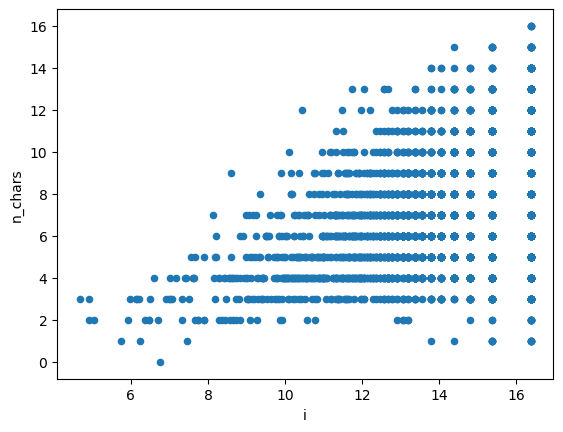

In [57]:
my_text.VOCAB.plot.scatter('i','n_chars');

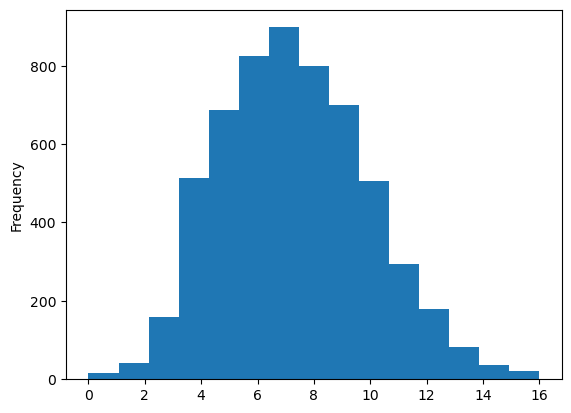

In [58]:
my_text.VOCAB.n_chars.plot.hist(bins=15);